<a href="https://colab.research.google.com/github/inschools-ng/MitsLinReg2/blob/main/Copy_of_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np # for data manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualisation
from pylab import rcParams
rcParams['figure.figsize'] = [8,5]
sns.set(color_codes=True, font_scale=1.2)
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-v0_8')


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The PatientSatisfaction dataset has been uploaded to a Github Account.

This notebook will be cloning and reading the files directly from the Github repository.

In [6]:
#!pip install heatmapz
!git clone "https://github.com/inschools-ng/MitsLinReg2.git"

fatal: destination path 'MitsLinReg2' already exists and is not an empty directory.


In [7]:
df = pd.read_csv("/content/MitsLinReg2/PatientSatisfaction.csv")

In [8]:
print('\n', df.head())
print('\n', df.tail())


    OBS  SATISFAC  AGE  SEVERITY  ANXIETY
0    1        48   50        51      2.3
1    2        57   36        46      2.3
2    3        66   40        48      2.2
3    4        70   41        44      1.8
4    5        89   28        43      1.8

     OBS  SATISFAC  AGE  SEVERITY  ANXIETY
18   19        60   33        49      2.1
19   20        49   55        51      2.4
20   21        77   29        52      2.3
21   22        52   44        58      2.9
22   23        60   43        50      2.3


In [ ]:
print('\nNumber of rows and Columns in the data set: ', df.shape)


Number of rows and Columns in the data set:  (23, 5)


In [9]:
df.describe()

,OBS,SATISFAC,AGE,SEVERITY,ANXIETY
count,23.00000,23.000000,23.000000,23.000000,23.000000
mean,12.00000,61.347826,39.608696,50.782609,2.295652
std,6.78233,16.713111,8.467795,4.441094,0.303732
min,1.00000,26.000000,28.000000,43.000000,1.800000
25%,6.50000,50.000000,33.000000,48.000000,2.150000
50%,12.00000,60.000000,40.000000,50.000000,2.300000
75%,17.50000,73.500000,44.500000,53.500000,2.400000
max,23.00000,89.000000,55.000000,62.000000,2.900000


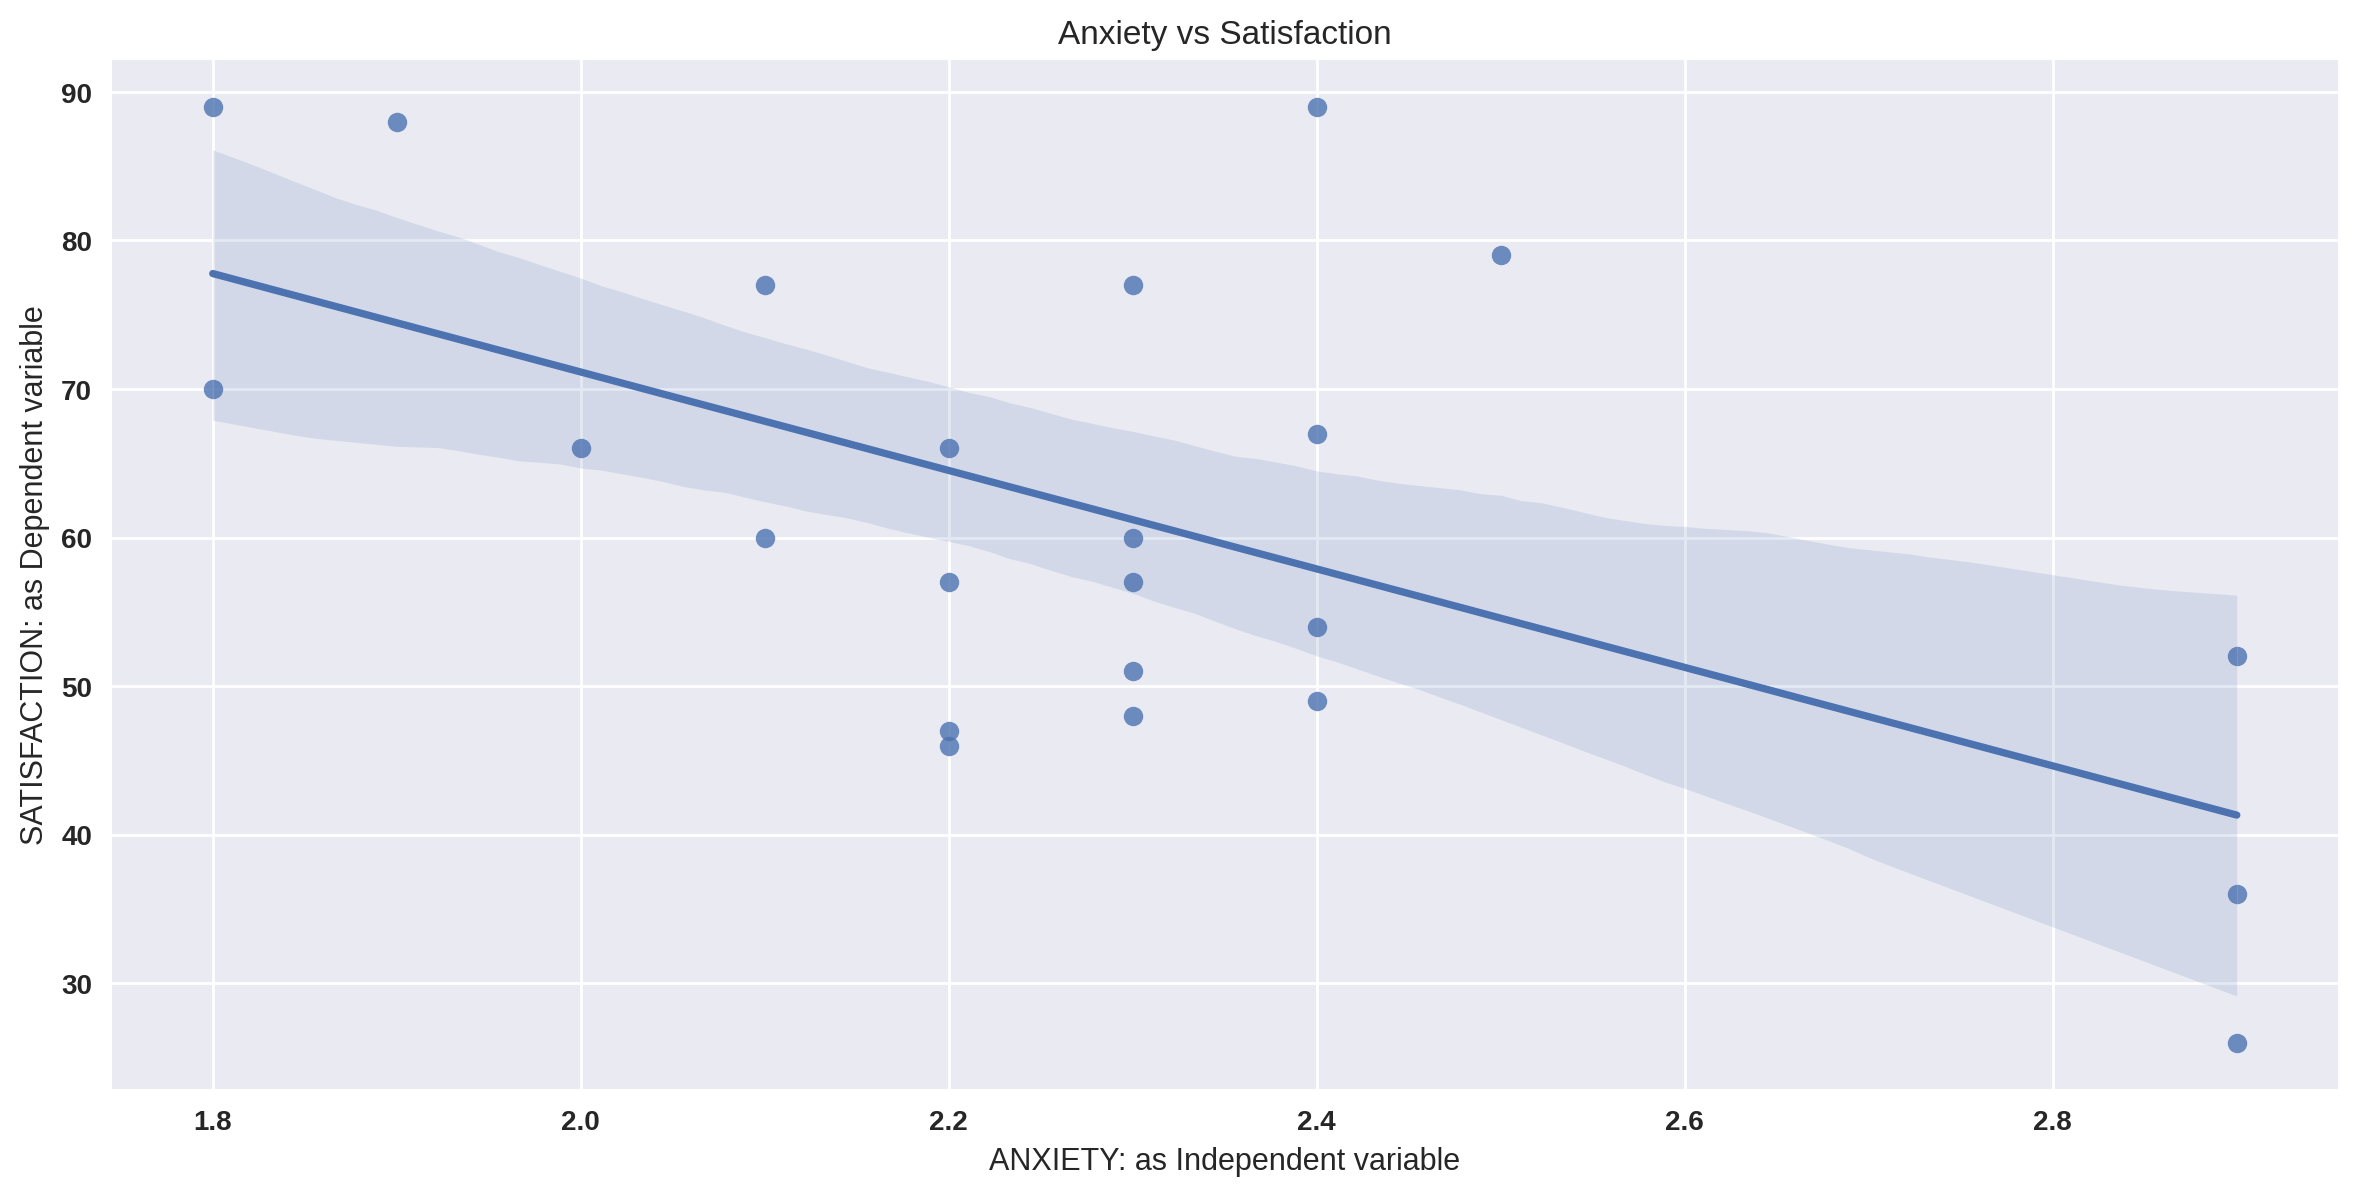

In [37]:
sns.lmplot(x='ANXIETY', y='SATISFAC', data=df, aspect=2, height=6)
plt.xlabel('ANXIETY: as Independent variable')
plt.ylabel('SATISFACTION: as Dependent variable')
plt.title('Anxiety vs Satisfaction');

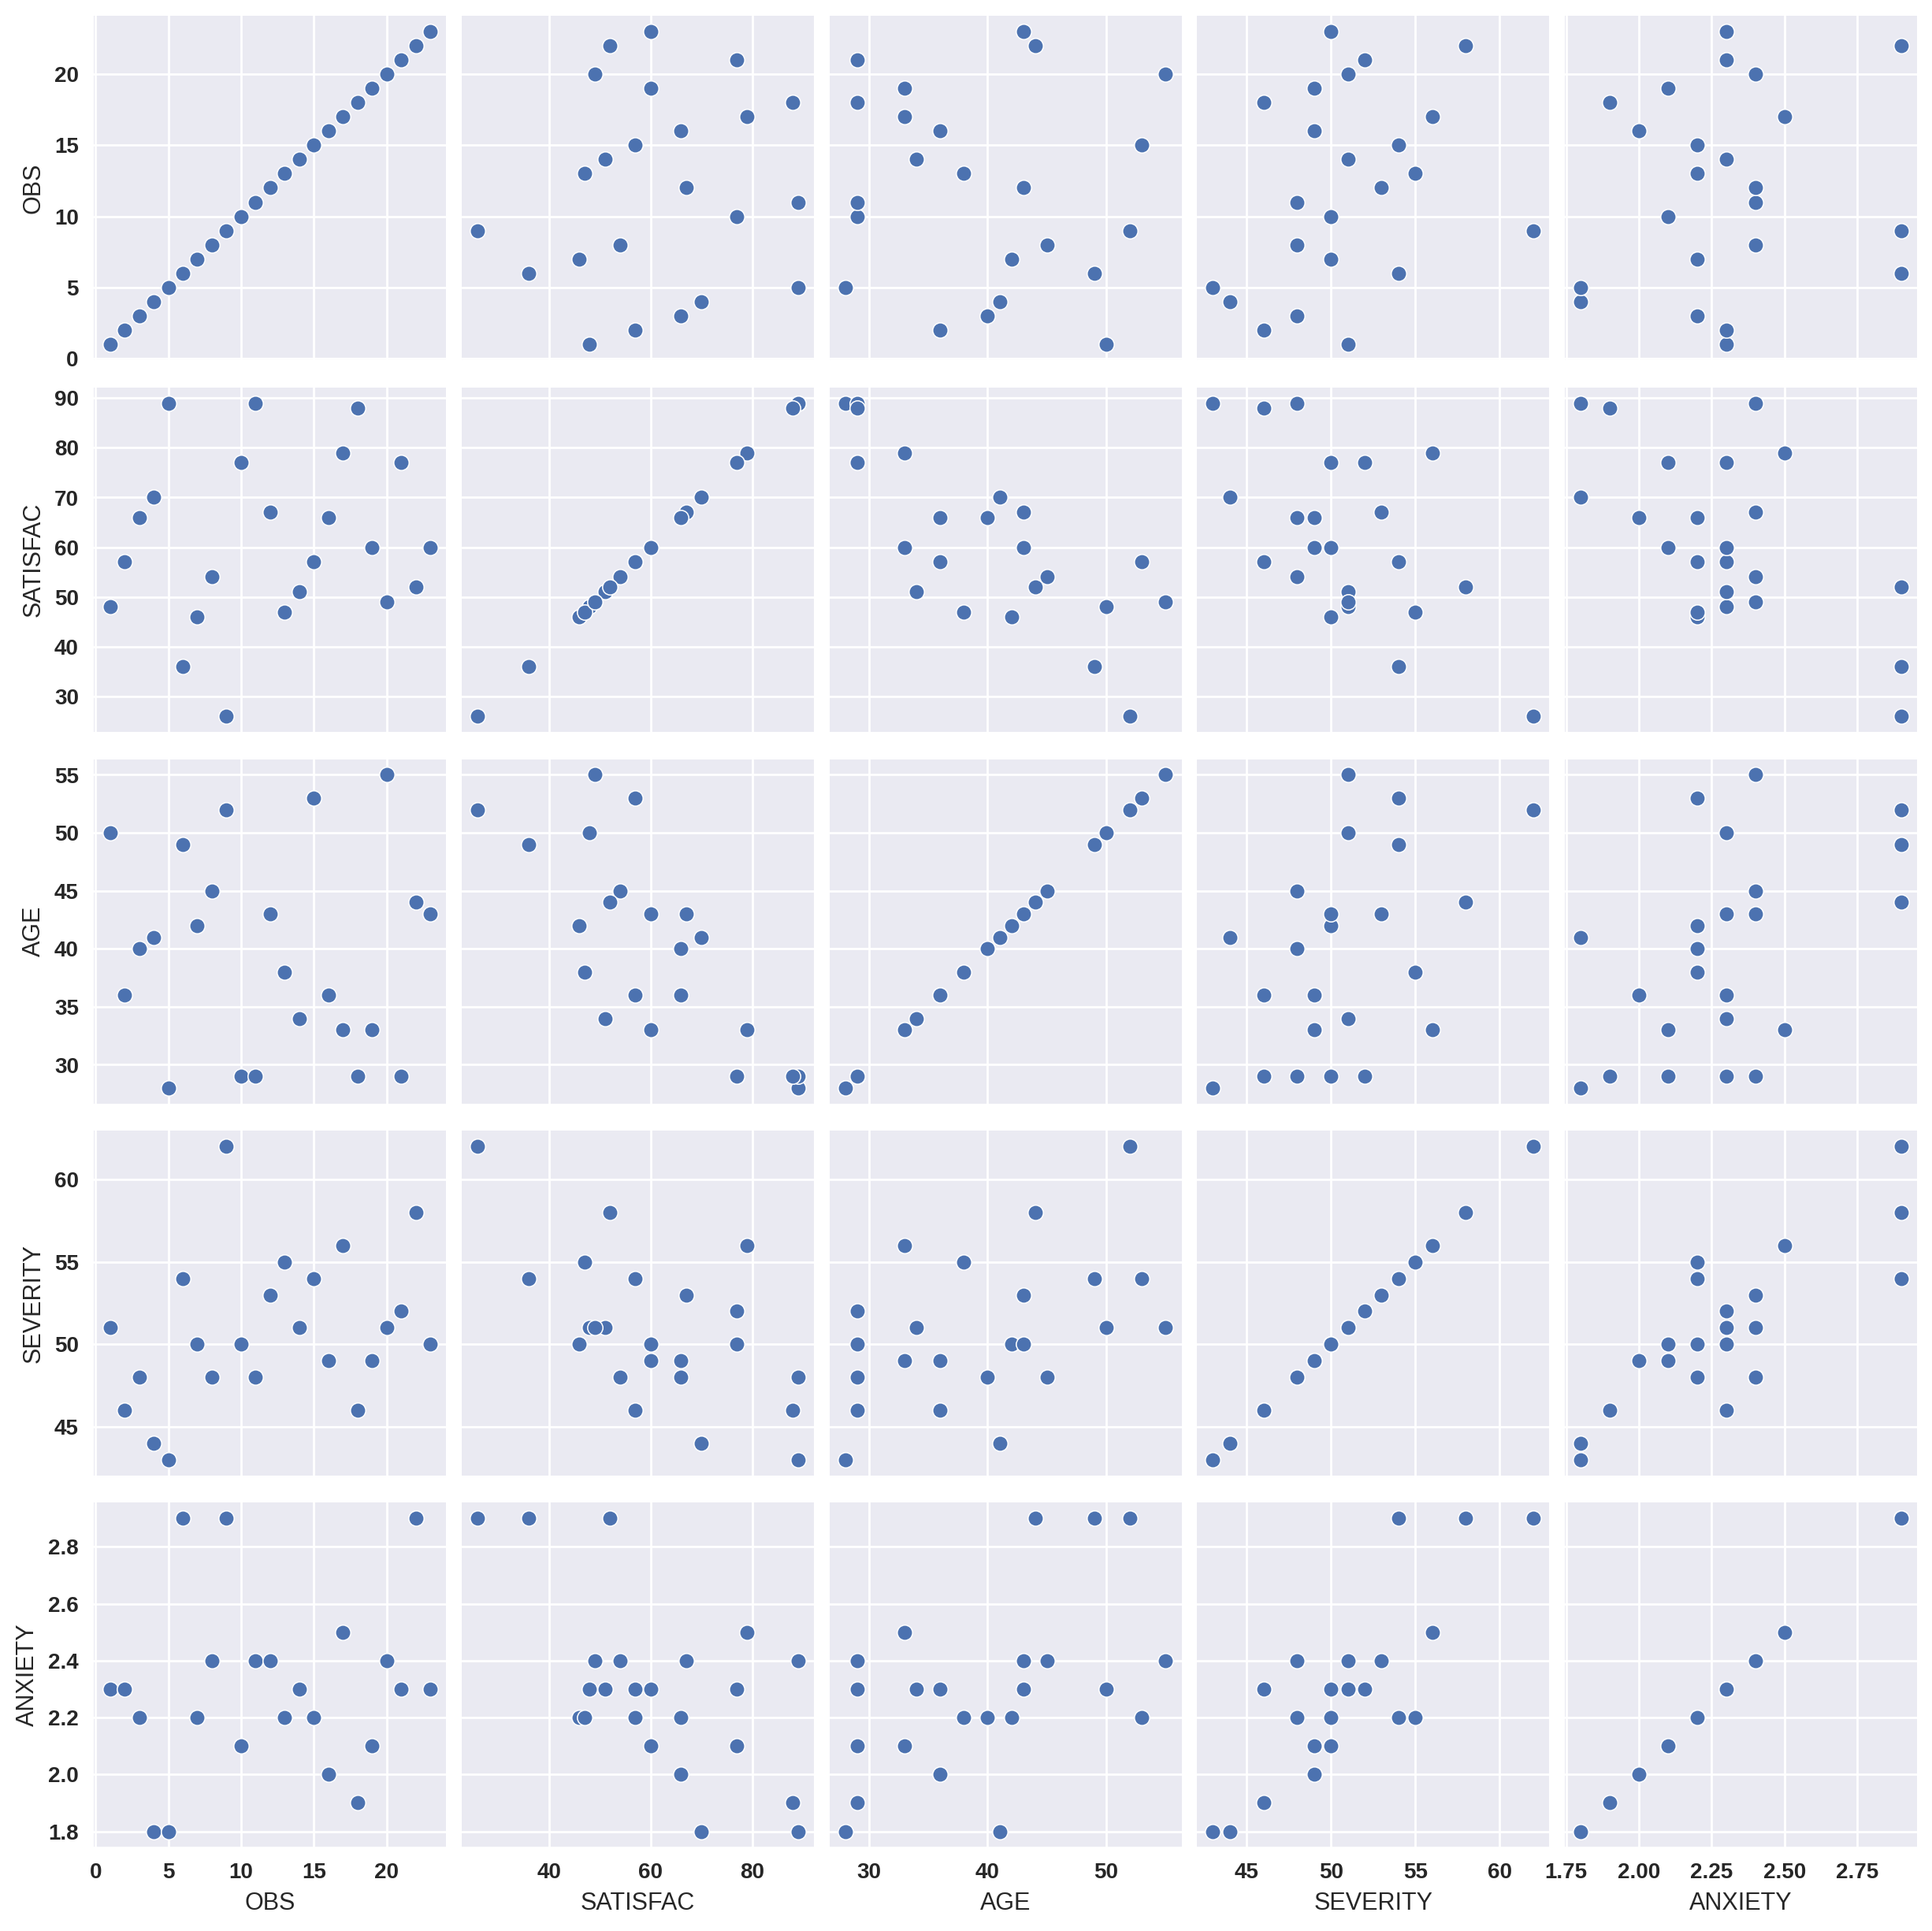

In [10]:

sns.pairplot(df, kind="scatter", diag_kind=None)


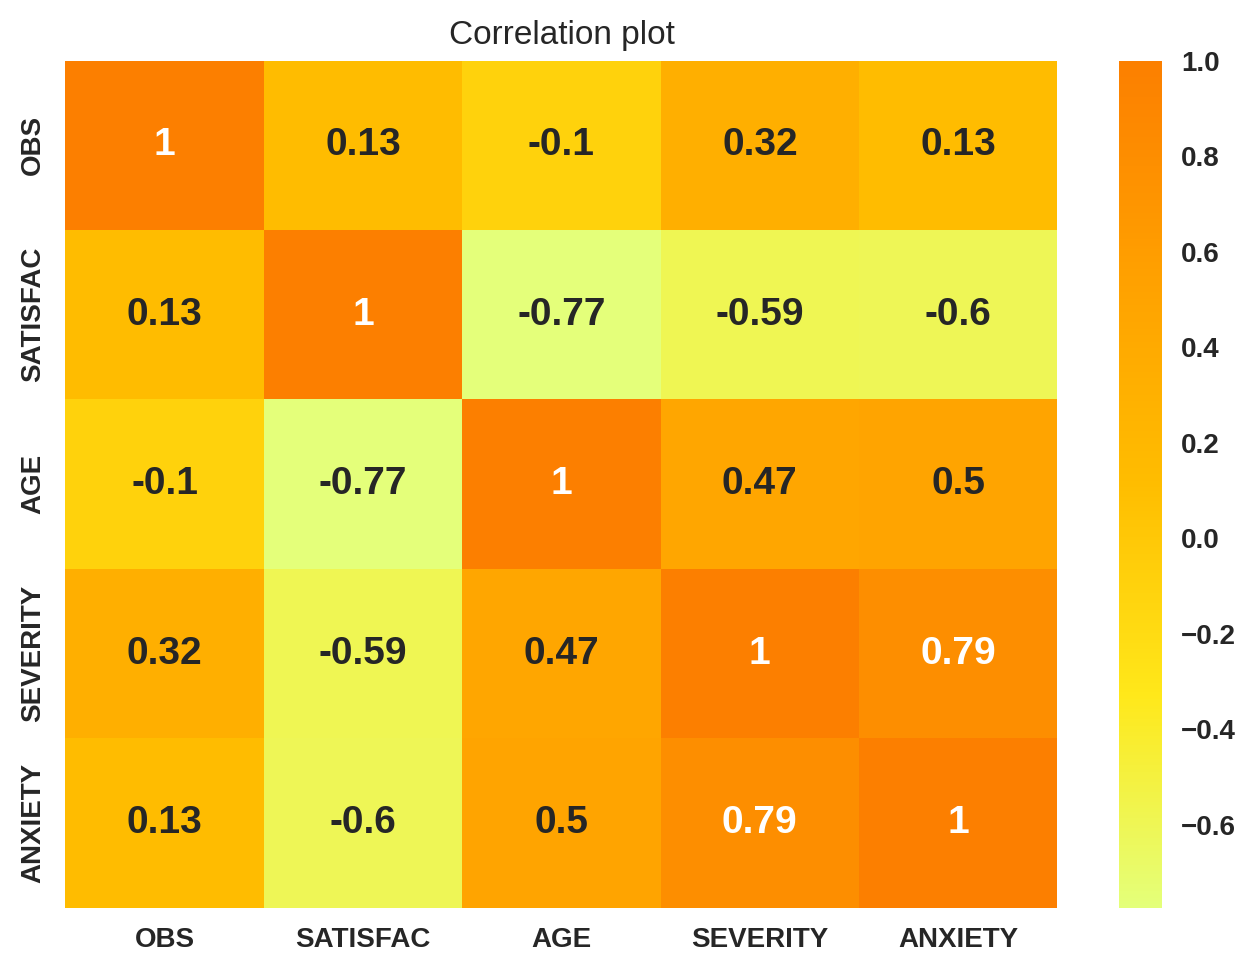

In [11]:
#Correlation plot
corr = df.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.title('Correlation plot');

QUESTION 1B: What do the scatter plot matrix and correlation matrix show about pairwise linear associations among the predictor variables?

Scatterplot Matrix:

Positive Linear Association: There is a positive linear association between
severity and anxiety, age and anxiety, age and severity.  
Negative Linear Association: There is a negative linear relatassociationionship between
age and satisfaction, severity and satisfaction, anxiety and satisfaction.  
No Linear Association: There is no linear association between the observations and anxiety, age, severity and satisfaction.

Correlation Matrix:

A positive correlation coefficient: There is a very strong positive linear association between severity and anxiety. There is a positive linear association between age and severity and age and anxiety.
A negative correlation coefficient: There is a very strong negative linear association between age and satisfaction. There is also a negative linear association between anxiety and satisfaction, severity and satisfaction.
Weak/No linear association: There is a weak or no clear linear association between the pairwise combination of observations with satisfaction, severity, anxiety and age.



<Figure size 1400x600 with 0 Axes>

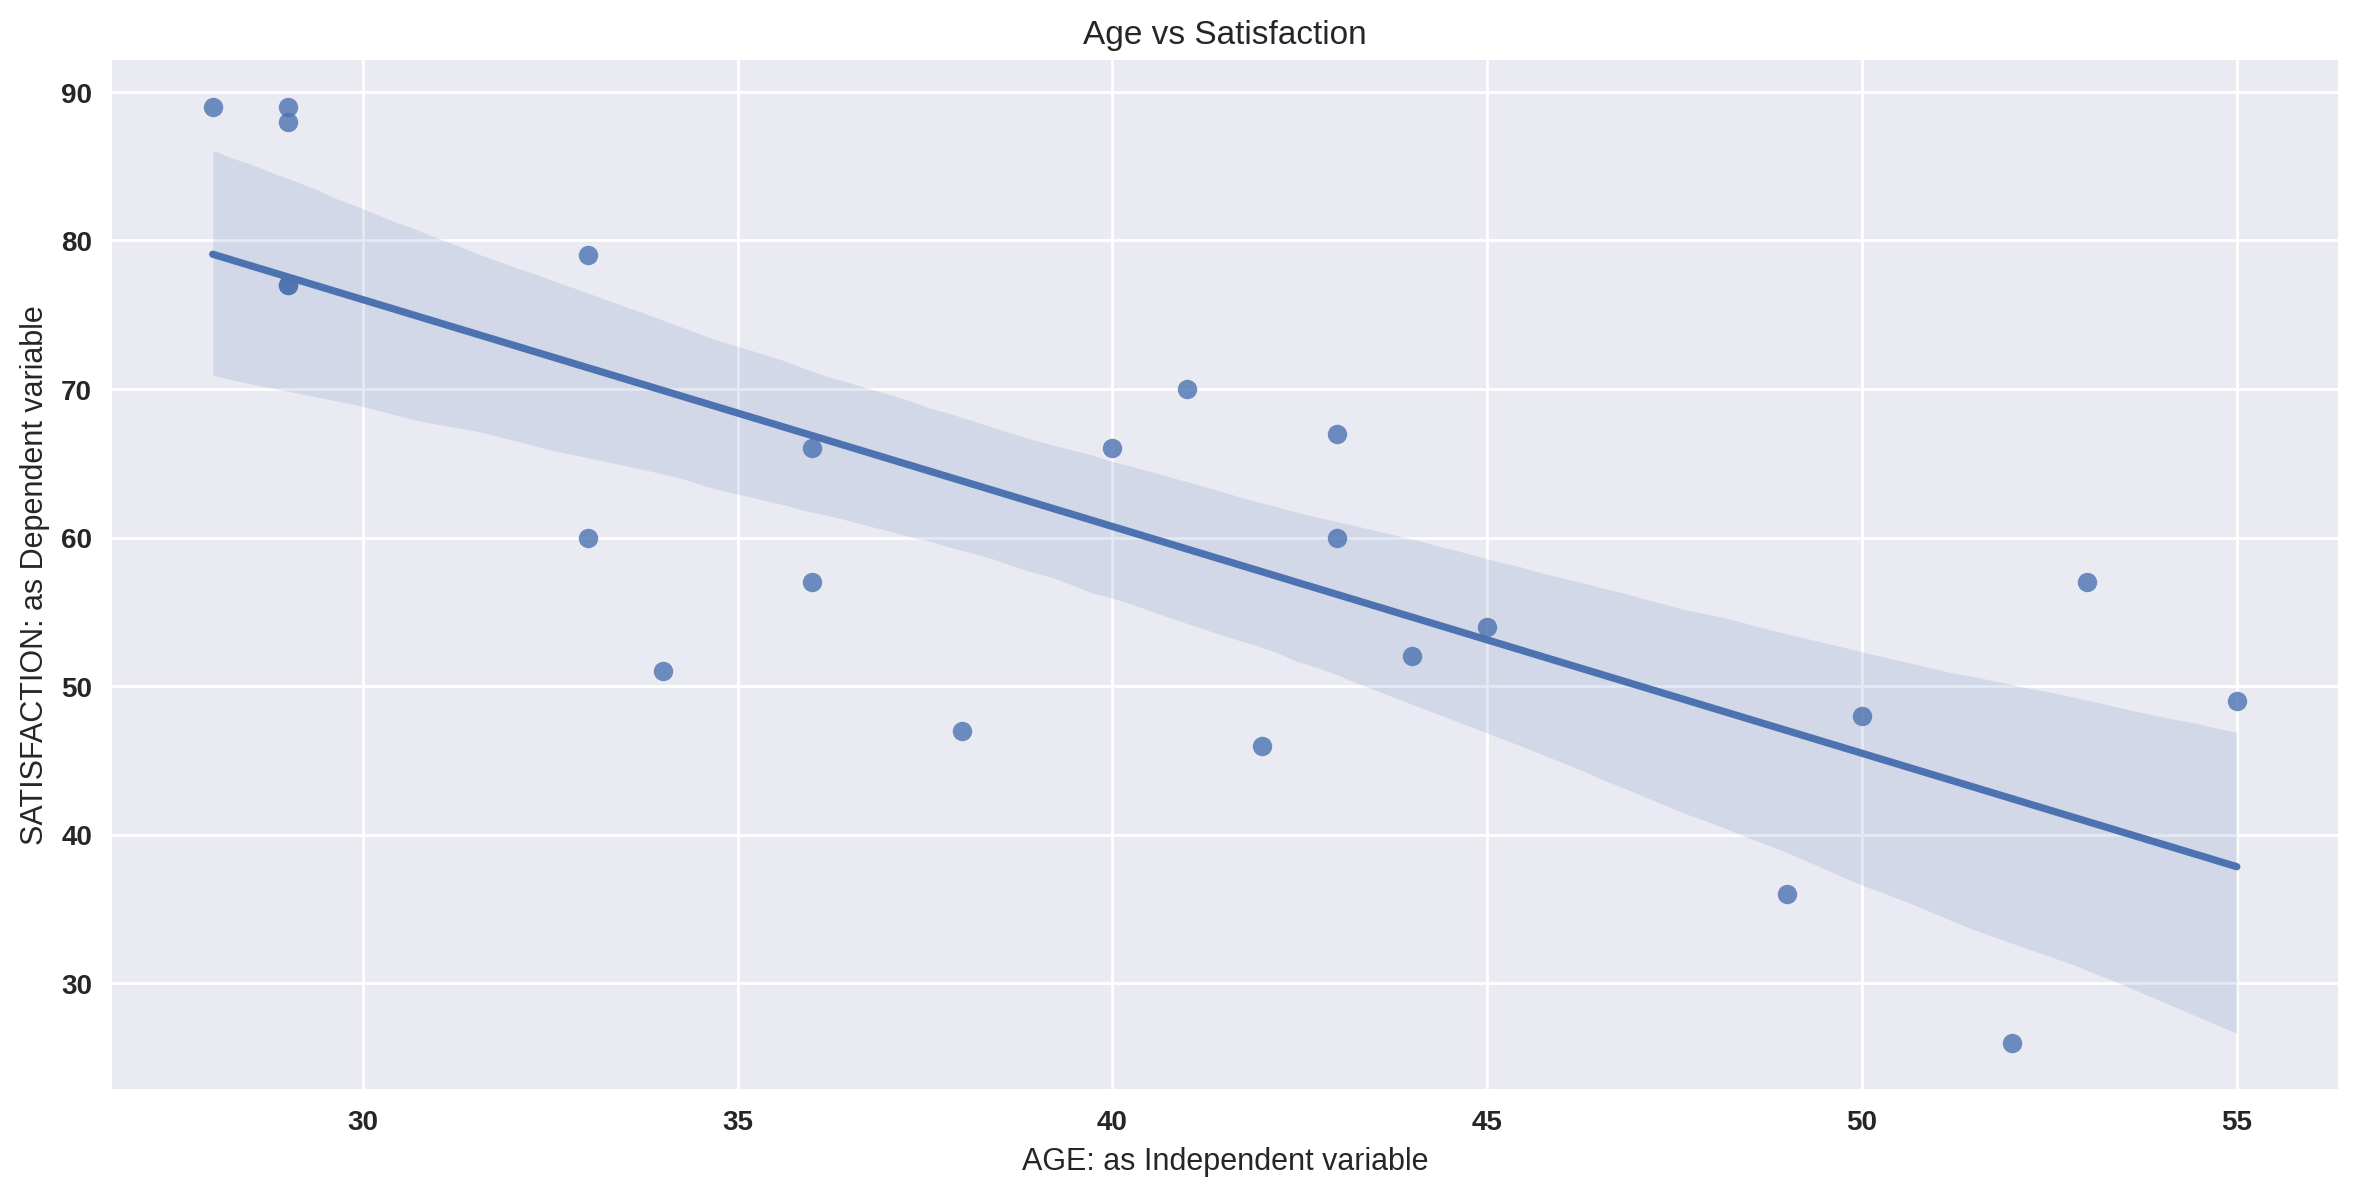

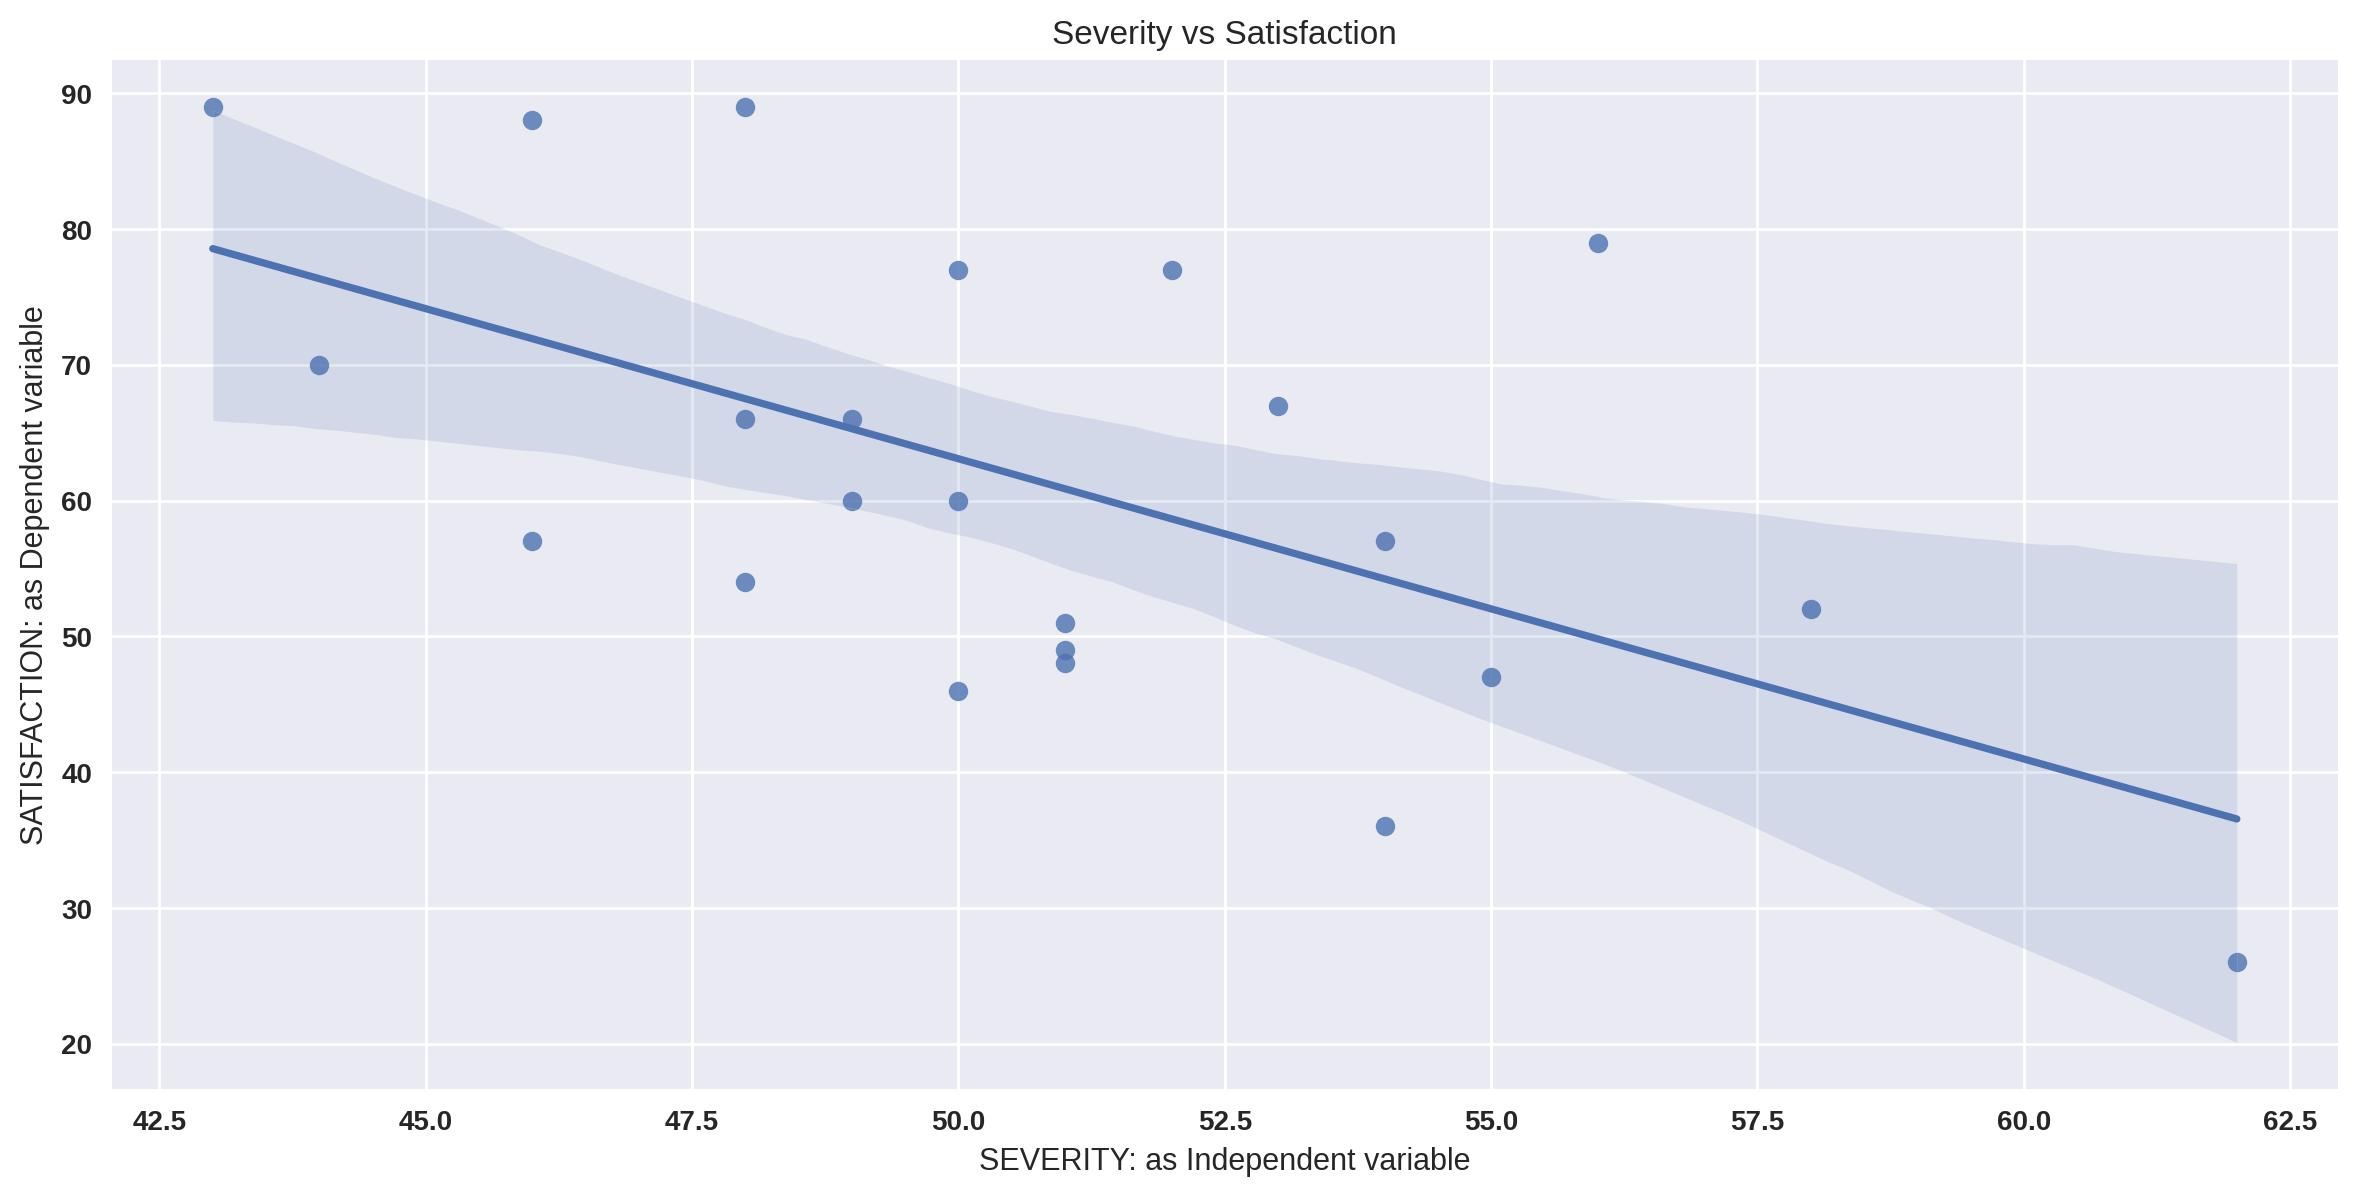

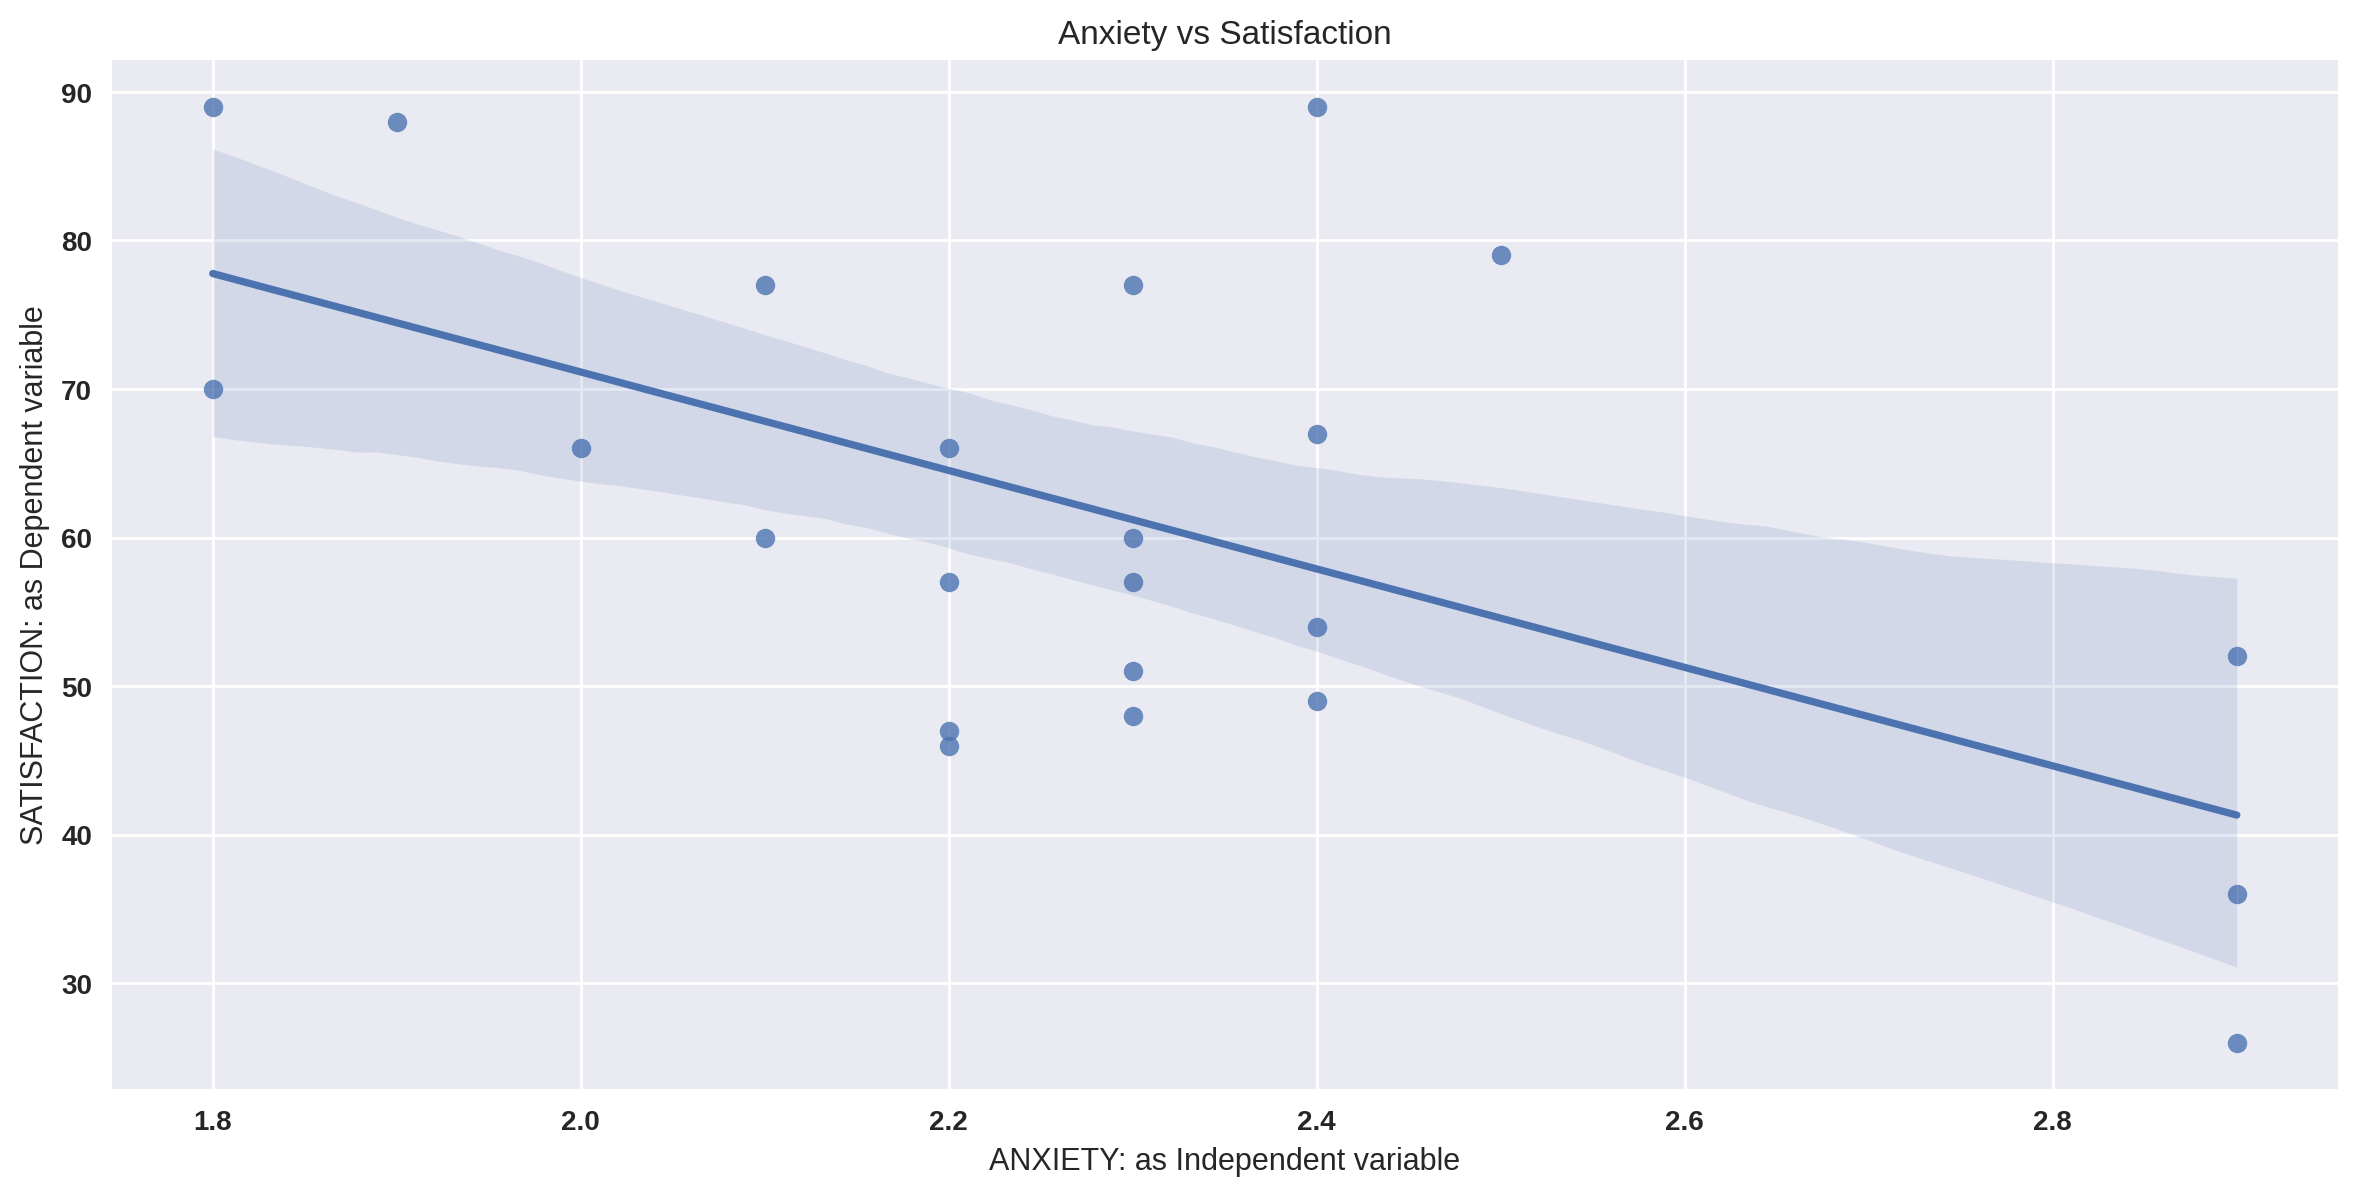

In [40]:
f = plt.figure(figsize=(14,6))
#ax = f.add_subplot(231)
sns.lmplot(x='AGE', y='SATISFAC', data=df, aspect=2, height=6)
plt.xlabel('AGE: as Independent variable')
plt.ylabel('SATISFACTION: as Dependent variable')
plt.title('Age vs Satisfaction');

#ax = f.add_subplot(232)
sns.lmplot(x='SEVERITY', y='SATISFAC', data=df, aspect=2, height=6)
plt.xlabel('SEVERITY: as Independent variable')
plt.ylabel('SATISFACTION: as Dependent variable')
plt.title('Severity vs Satisfaction');

#ax = f.add_subplot(233)
sns.lmplot(x='ANXIETY', y='SATISFAC', data=df, aspect=2, height=6)
plt.xlabel('ANXIETY: as Independent variable')
plt.ylabel('SATISFACTION: as Dependent variable')
plt.title('Anxiety vs Satisfaction');

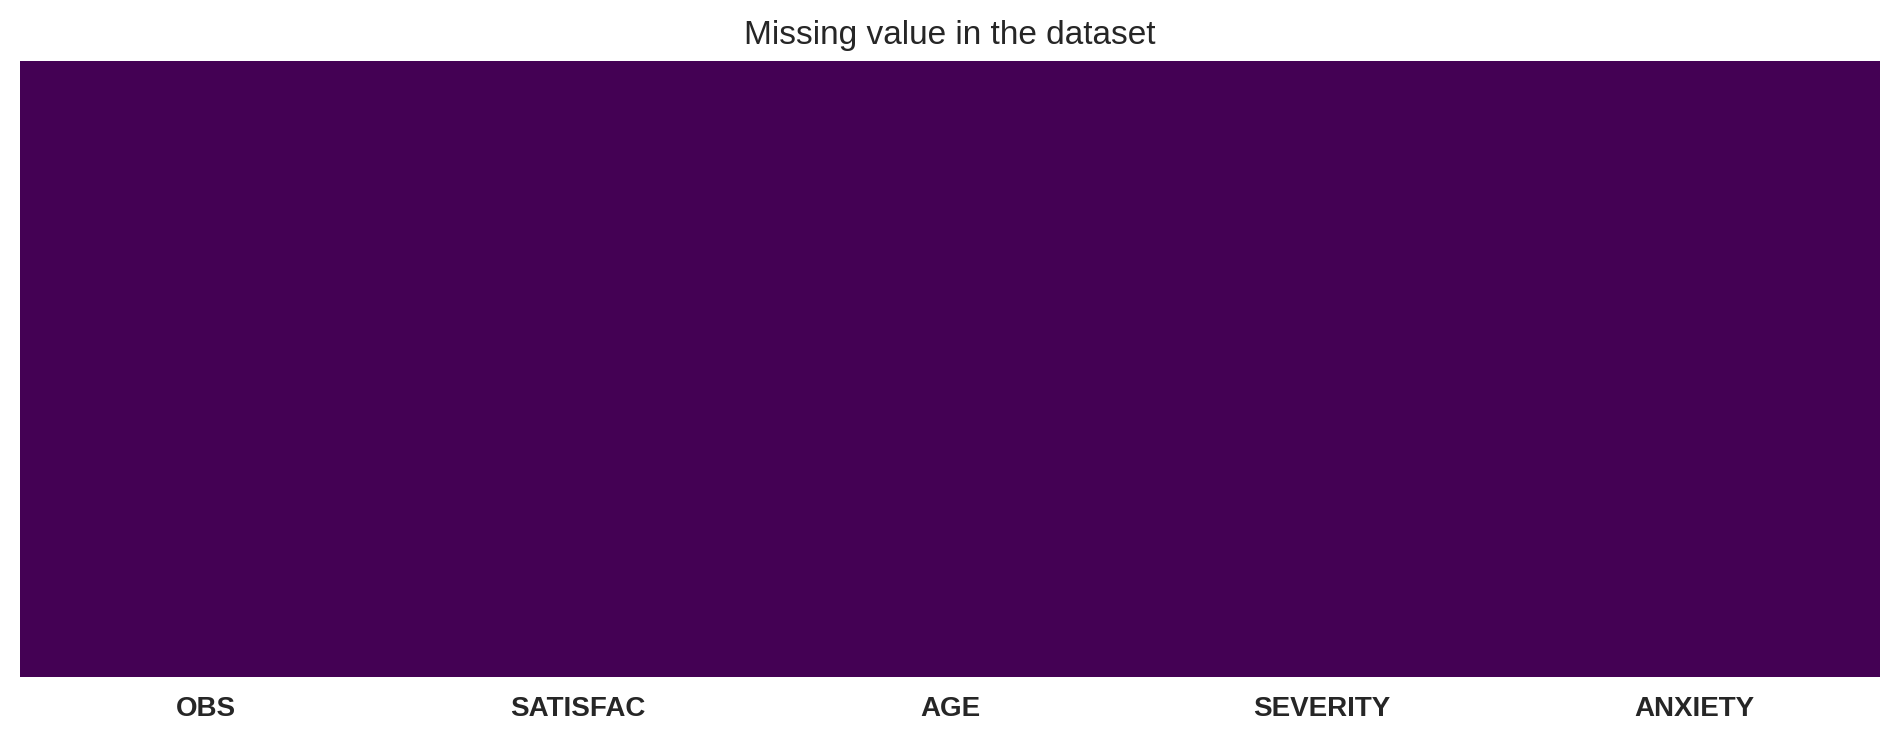

In [41]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing value in the dataset.

In [87]:
from sklearn import linear_model
# Split the data into training/testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('SATISFAC', axis=1) # Independent Variable
Y = df['SATISFAC'] # Dependent Varaible

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2000)

X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]









In [88]:


# Create the linear regression model with an intercept
model_with_intercept = linear_model.LinearRegression(fit_intercept=True)
model_without_intercept = linear_model.LinearRegression(fit_intercept=False)

# Fit the model to the data
model_with_intercept.fit(X_train, Y_train)
model_without_intercept.fit(X_train, Y_train)


# Print the coefficients and intercept
model_with_intercept_coefficients = model_with_intercept.coef_
model_without_intercept_coefficients = model_without_intercept.coef_

model_with_intercept_interceptValue = model_with_intercept.intercept_
model_without_intercept_interceptValue = model_without_intercept.intercept_


print('\nThe regression model (with intercept) coefficients are:  ', model_with_intercept_coefficients)
print('\nThe regression model (with intercept) intercept is:  ', model_with_intercept_interceptValue)
print('\nThe regression model (without intercept) coefficients are:  ', model_without_intercept_coefficients)
print('\nThe regression model (without intercept) intercept is:  ', model_without_intercept_interceptValue)




The regression model (with intercept) coefficients are:   [ 0.44066288 -0.84527769 -1.7808317  -3.34324537]

The regression model (with intercept) intercept is:   186.38438831455778

The regression model (without intercept) coefficients are:   [ 0.33351753 -1.43332104  1.86851298  8.29522583]

The regression model (without intercept) intercept is:   0.0


(1.E)


The regression model (with intercept) coefficients are:   [ 0.56713169 -1.17612336 -2.06966534  8.84955609]

The regression model (with intercept) intercept is:   184.36765594367483

The regression model (without intercept) coefficients are:   [-0.07751307 -0.9796713   2.00761371 -1.7056808 ]

The regression model (without intercept) intercept is:   0.0


In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Y_pred_with_intercept = model_with_intercept.predict(X_test)
Y_pred_without_intercept = model_without_intercept.predict(X_test)

J_Mean_Absolute_Error = mean_absolute_error(Y_test, Y_pred_with_intercept)
J_Mean_Squared_Error = mean_squared_error(Y_test, Y_pred_with_intercept)
R_square = model_with_intercept.score(X_test,Y_test)

J_Mean_Absolute_Error_without_intercept = mean_absolute_error(Y_test, Y_pred_without_intercept)
J_Mean_Squared_Error_without_intercept = mean_squared_error(Y_test, Y_pred_without_intercept)
R_square_without_intercept = model_without_intercept.score(X_test,Y_test)



print('The Mean Absolute Error(MSE) or J(theta) is: ', J_Mean_Absolute_Error)
print('The Mean Square Error(MSE) or J(theta) is: ', J_Mean_Squared_Error)
print('R square obtain from the scikit learn library is :', R_square)

print('\nThe Mean Absolute Error(MSE) or J(theta) from model without intercept is: ', J_Mean_Absolute_Error_without_intercept)
print('The Mean Square Error(MSE) or J(theta) from model without intercept is: ', J_Mean_Squared_Error_without_intercept)
print('R square obtain from the scikit learn library from model without intercept is :', R_square_without_intercept)

The Mean Absolute Error(MSE) or J(theta) is:  8.123549222832576
The Mean Square Error(MSE) or J(theta) is:  112.47653207443128
R square obtain from the scikit learn library is : 0.5836669674473229

The Mean Absolute Error(MSE) or J(theta) from model without intercept is:  16.96840390887125
The Mean Square Error(MSE) or J(theta) from model without intercept is:  399.7275695133003
R square obtain from the scikit learn library from model without intercept is : -0.47959568223756377


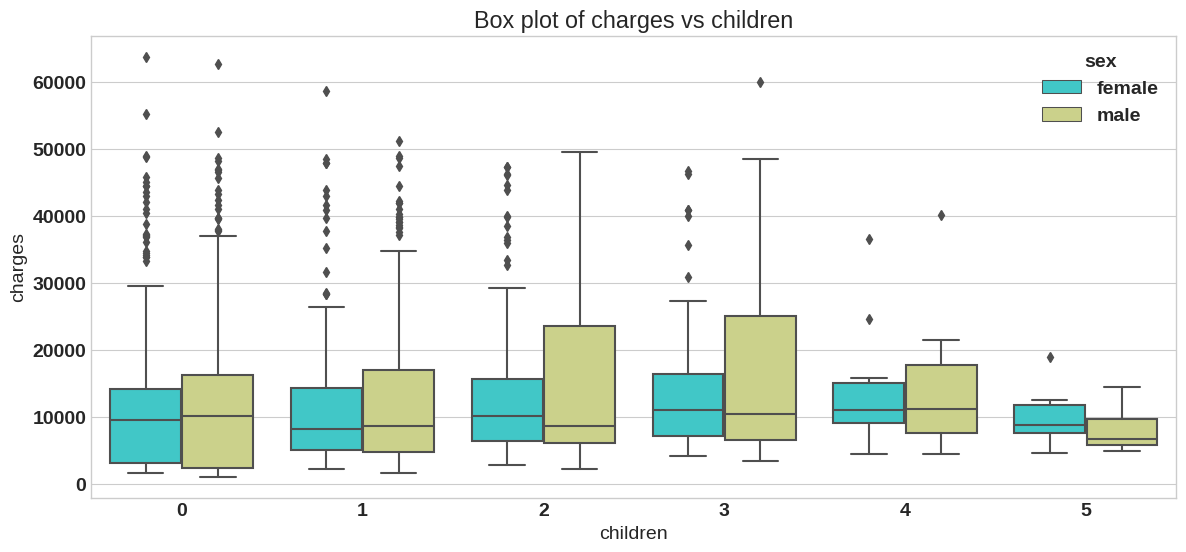

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges', hue='sex', data=df, palette='rainbow')
plt.title('Box plot of charges vs children');

In [ ]:
df.groupby('children').agg(['mean', 'min', 'max'])['charges']

<ipython-input-13-7f0b24c9dada>:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('children').agg(['mean', 'min', 'max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Violin plot of charges vs children')

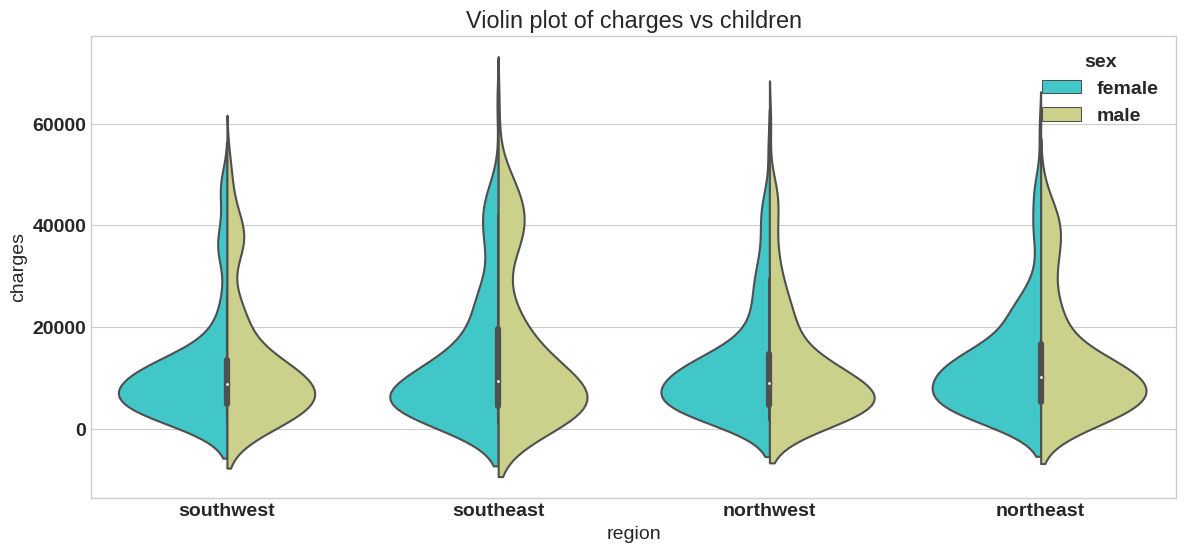

In [ ]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='region', y='charges', hue='sex', data=df, palette='rainbow', split=True)
plt.title('Violin plot of charges vs children')

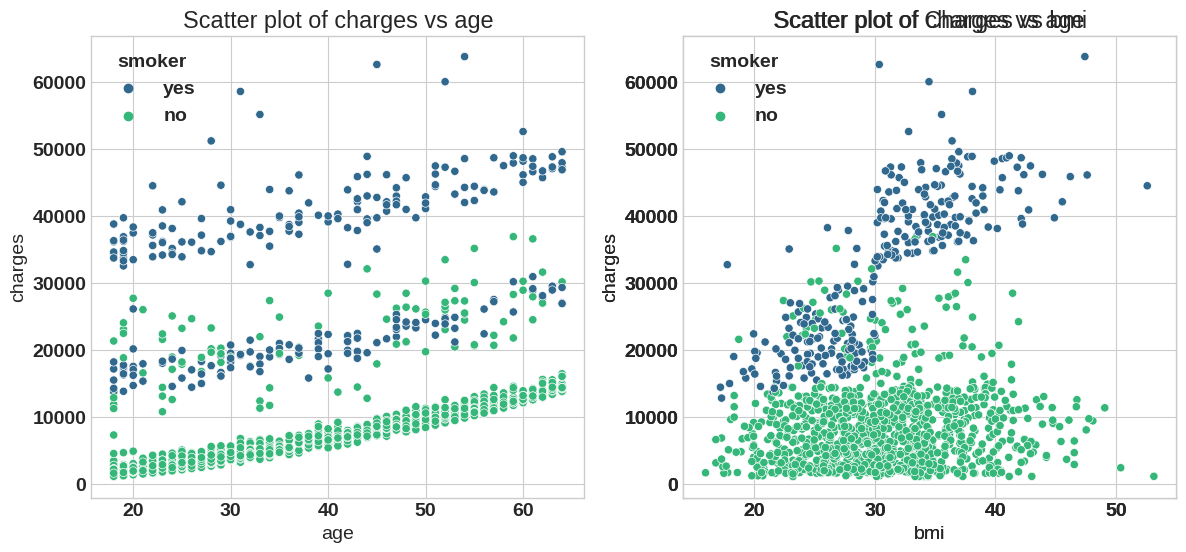

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)

sns.scatterplot(x='age', y='charges', data=df, palette='viridis', hue='smoker', ax=ax)
ax.set_title('Scatter plot of charges vs age')

ax = f.add_subplot(122)

sns.scatterplot(x='bmi', y='charges', data=df, palette='viridis', hue='smoker')
ax.set_title('Scatter plot of charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=df, palette = 'viridis', hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');


In [ ]:
# dummy variable
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data=df, prefix = 'OHE', prefix_sep='_', columns=categorical_columns, drop_first=True, dtype='int8')

In [ ]:
print('Columns in original data frame:\n', df.columns.values)
print('\nNumber of rows and columns in the dataset:', df.shape)
print('\nColumns in data frame after encoding dummy variable:\n', df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:', df_encode.shape)





Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [ ]:
df_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [ ]:
from scipy.stats import boxcox
df_encode['charges']


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
#transformed variable, lambda value and confidence interval
y_bc, lam, ci = boxcox(df_encode['charges'], alpha=0.05)
y_bc, lam, ci

(array([12.12897974,  8.80859638, 10.14752106, ...,  8.72968299,
         9.01913128, 12.9736611 ]),
 0.043649053770664956,
 (-0.01140290617294196, 0.0988096859767545))

In [ ]:
#transformed variable
y_bc

array([12.12897974,  8.80859638, 10.14752106, ...,  8.72968299,
        9.01913128, 12.9736611 ])

In [ ]:
#log transform
df_encode['charges']= np.log(df_encode['charges'])
df_encode['charges']


0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1338, dtype: float64

In [ ]:
##Train Test Split
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges', axis=1) #independent variable
y = df_encode['charges'] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=23)

# Model building
# Step 1 - Add x0 = 1 to data set

X_train_0 = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Step 2 - Build model, define theta
theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))

# Step 3 - Build model, define parameter, define columns
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter, 'Columns':columns,'theta':theta})

In [ ]:
# Scikit Learn Module
# You do not need to add the x_0  = 1 training data
# Sci-kit does that
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))


## If the parameter obtained from both the models are the same,
## We have successfully built our model using normal equation
## We have also verified it using the sklearn linear regression module


parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-11738.954855,-11738.954855
1,theta_1,age,246.272603,246.272603
2,theta_2,bmi,347.988088,347.988088
3,theta_3,OHE_male,-127.955178,-127.955178
4,theta_4,OHE_1,321.846883,321.846883
5,theta_5,OHE_2,1476.269020,1476.269020
6,theta_6,OHE_3,1198.109156,1198.109156
7,theta_7,OHE_4,3767.409106,3767.409106
8,theta_8,OHE_5,1964.399228,1964.399228
9,theta_9,OHE_yes,24252.366362,24252.366362


In [ ]:
## Model Evaluation

# Normal Equation

y_pred_norm = np.matmul(X_test_0, theta)

# Evaluation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/X_test_0.shape[0]

# R_Square
sse = np.sum((y_pred_norm - y_test) ** 2)
sst = np.sum((y_test - y_test.mean())** 2)

R_square = 1 - (sse/sst)

print('The Mean Square Error (MSE) or J(theta) is: ', J_mse)
print('R square obtained for normal equation method is: ', R_square)


The Mean Square Error (MSE) or J(theta) is:  35152074.79986031
R square obtained for normal equation method is:  0.7305284299807454


In [ ]:

# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

# Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test, y_test)
print('The Mean Square Error (MSE) or J(theta) is: ', J_mse_sk)
print('R square obtained for scikit learn library is: ', R_square_sk)

The Mean Square Error (MSE) or J(theta) is:  35152074.79986037
R square obtained for scikit learn library is:  0.730528429980745


<ipython-input-61-154119529140>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred_sk), ax=ax, color='b')


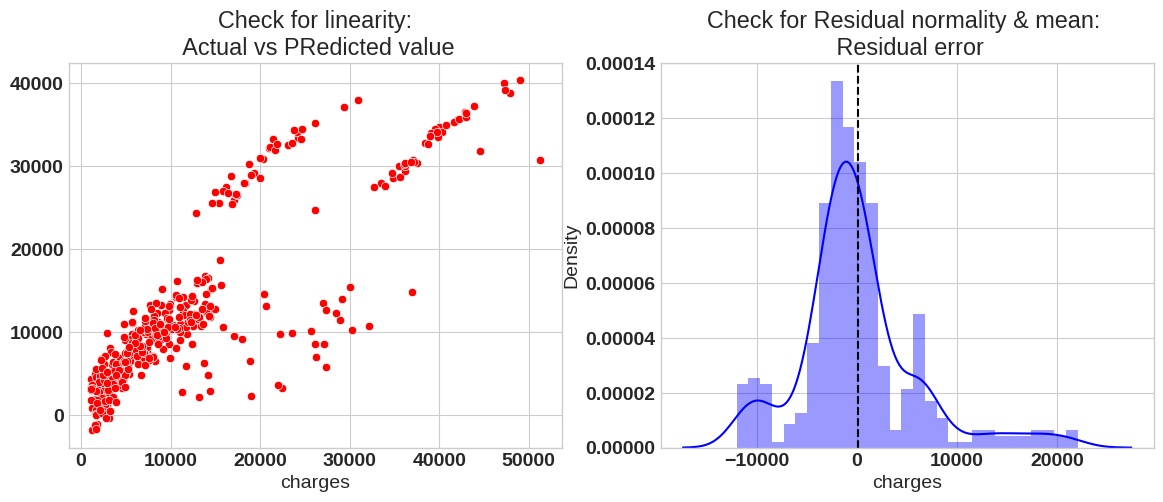

In [ ]:
# For the above, the model returns rsquare value of 73%, same as the above.
# We have a transformer out variable by applying natural log.
# When the model is put into production, antilog is used.


# Model Validation
# Linear relationship
# Residual error plot should be normally distributed
# The mean of residual error should be 0 or close to 0 as much as possible.
# Linear regression asssumes that there is little or no multicom=llinearity in the data
# Variance inflation factor VIF* identifies correlation between independent variables and strength
# of that correlation. VIF > 5 = Critical levels of multicollinearity.

# Check for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x = y_test, y = y_pred_sk, ax=ax, color = 'r')
ax.set_title("Check for linearity:\n Actual vs Predicted value")

# check for residual normality & mean
ax=f.add_subplot(122)
sns.distplot((y_test-y_pred_sk), ax=ax, color='b')
ax.axvline((y_test-y_pred_sk).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error');



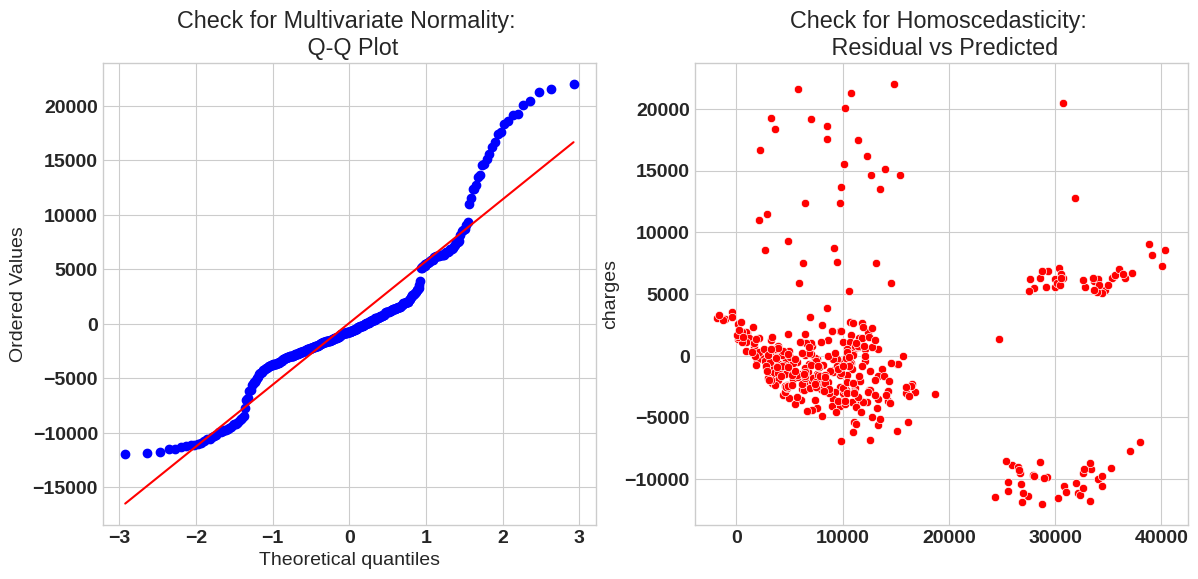

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile Plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \n Q-Q Plot')

# Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x=y_pred_sk, ax = ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity: \n Residual vs Predicted');

In [ ]:
# Check for Multicollinearity
# VAriance Inflation Factor
VIF = 1/(1-R_square_sk)
print(VIF)

3.710966614877203


In [ ]:
# In our model, the actual vs predicted plot is curved, so linear assumption fails
# the residual mean is zero and residual error plot is right skewed


# Exhibits homoscedasity - Error will increase after a certain point
# VIF is less than 5 so no multicollinearity